# Document Clustering


In [9]:
# for clustering
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer 

# data
import pandas as pd
import numpy as np
import os
import json

# viz
import matplotlib.pyplot as plt
%matplotlib inline

# other
from tqdm import tqdm
from copy import deepcopy
import time
import re

MAX_TITLE_LEN = 70

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df = pd.read_csv("bbc-text.csv")
# df = pd.read_csv("1st_Input_df_for_tm.csv")
# df.rename(columns = {"Text":"text"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [11]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [12]:
df["text"][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [13]:
## Text pre-processing

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [14]:
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(list(df['text']))

In [15]:
norm_corpus[0]

'tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also builtin highdefinition tv sets big business japan us slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment us networks cable satellite companies worried means terms advertising revenues

In [16]:
len(norm_corpus)

2225

## Extract TF-IDF Features

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stopwords.words('english')
file = open("stopwords/extended_stopwords.txt", "r")
stop_words.extend([line.strip() for line in file.readlines()])
file.close()

cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(2225, 6072)

## Cluster Movies using K-Means

In [10]:
df["category"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [15]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS).fit(cv_matrix)
km

KMeans(n_clusters=5)

In [16]:
from collections import Counter

Counter(km.labels_)

Counter({1: 223, 4: 1682, 3: 183, 2: 133, 0: 4})

In [17]:
df['kmeans_cluster'] = km.labels_

In [18]:
df.head()

,category,text,kmeans_cluster
0,tech,tv future in the hands of viewers with home th...,1
1,business,worldcom boss left books alone former worldc...,4
2,sport,tigers wary of farrell gamble leicester say ...,4
3,sport,yeading face newcastle in fa cup premiership s...,4
4,entertainment,ocean s twelve raids box office ocean s twelve...,4


In [20]:
df.columns

Index(['category', 'text', 'kmeans_cluster'], dtype='object')

In [24]:
doc_clusters = (df[['category', 'text', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster')


In [25]:
doc_clusters

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
dir(AgglomerativeClustering)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'fit_predict',
 'get_params',
 'set_params']

In [19]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(cv_matrix.toarray())

In [20]:
y_hc 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
len(y_hc)

2225

In [23]:
for i in y_hc:
    print(i)

0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0


In [26]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix, cosine_distance

In [4]:
ward?

In [5]:
scipy.cluster.hierarchy.linkage?

Object `scipy.cluster.hierarchy.linkage` not found.


In [48]:
df.columns

Index(['category', 'text', 'kmeans_cluster'], dtype='object')

In [51]:
def plot_hierarchical_clusters(linkage_matrix, text_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    text_titles = text_data['category'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=text_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    
    temp = {R["leaves"][ii]: text_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('text_hierachical_clusters.png', dpi=200)

In [50]:
linkage_matrix, cosine_distance = ward_hierarchical_clustering(cv_matrix)

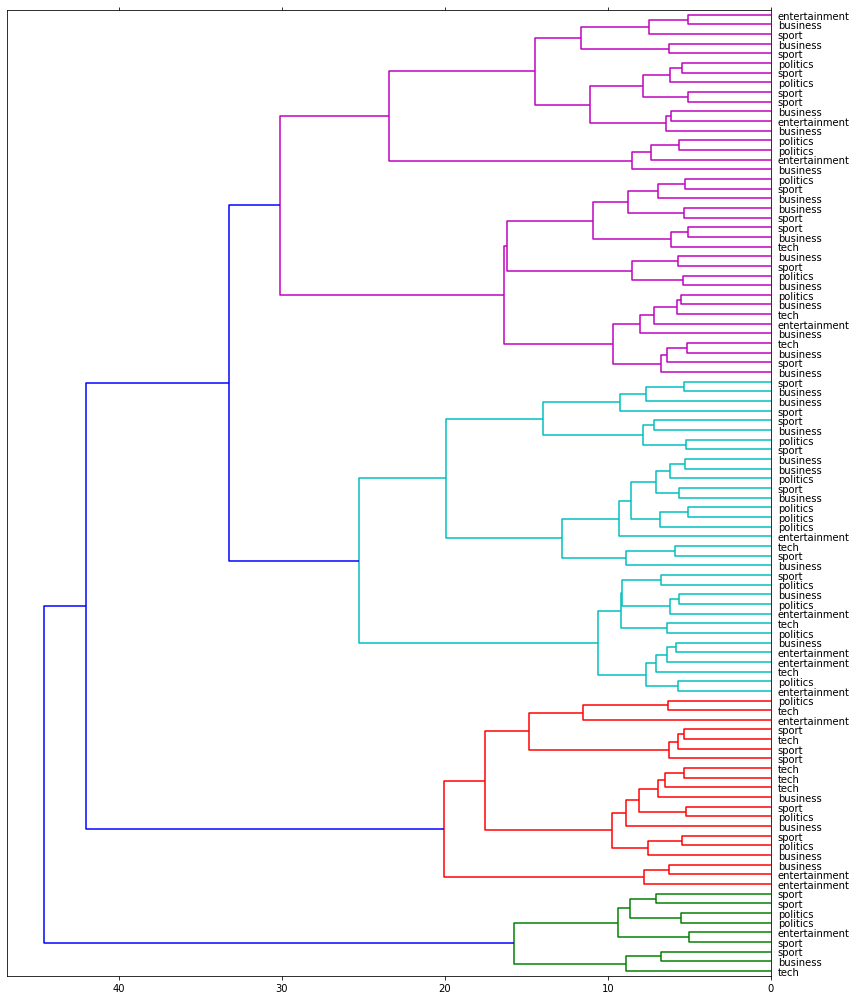

In [52]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           text_data=df,
                           figure_size=(12, 14))

In [53]:
def silhouette_k(distance_matrix, linkage_matrix, max_k=6):
    scores = []
    for i in range(2, max_k+1):
        clusters = fcluster(linkage_matrix, i, criterion='maxclust')
        score = silhouette_score(distance_matrix, clusters, metric='precomputed')
        print("Silhouette score with {} clusters:".format(i), score)
        scores.append(score)
    plt.title("Silhouette score vs. number of clusters")
    plt.xlabel("# of clusters")
    plt.ylabel("Score (higher is better)")
    plt.plot(np.arange(2, max_k+1), scores)
    plt.show()
    return scores

In [54]:
_ = silhouette_k(cosine_distance, linkage_matrix)

ValueError: Negative values in data passed to `pairwise_distances`. Precomputed distance  need to have non-negative values.

In [56]:
def plot_hierarchical_clusters(linkage_matrix, text_data, p=100, figure_size=(8,12)):
    # set size
    
    text_titles = text_data['category'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=text_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    
    return R

In [57]:
R = plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           text_data=df,
                           figure_size=(12, 14))

In [59]:
R.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [62]:
R["icoord"][:5]

[[15.0, 15.0, 25.0, 25.0],
 [5.0, 5.0, 20.0, 20.0],
 [35.0, 35.0, 45.0, 45.0],
 [55.0, 55.0, 65.0, 65.0],
 [75.0, 75.0, 85.0, 85.0]]

In [63]:
len(R["icoord"])

99

In [64]:
R["dcoord"][:5]

[[0.0, 6.754500822146901, 6.754500822146901, 0.0],
 [0.0, 8.865197017923148, 8.865197017923148, 6.754500822146901],
 [0.0, 4.985563423196923, 4.985563423196923, 0.0],
 [0.0, 5.498956488718304, 5.498956488718304, 0.0],
 [0.0, 7.030804122003277, 7.030804122003277, 0.0]]

In [66]:
len(R["dcoord"])

99

In [69]:
R["ivl"][:5]

['(21)', '(16)', '(36)', '(22)', '(27)']

In [68]:
len(R["ivl"])

100

In [71]:
R["leaves"][:5]

[4232, 4217, 4349, 4262, 4307]

In [72]:
len(R["leaves"])

100

In [74]:
R["color_list"]

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'b',
 'b',
 'b']

In [75]:
len(R["color_list"])

99

In [79]:
fcluster(linkage_matrix, threshold, criterion='distance', R=None, monocrit=None)
dataframe = pd.DataFrame({"Cluster":Y, "Sample Names":list(colnames)})
dataframe = dataframe.set_index("Sample Names")
#print(dataframe)
dictionary = {"clusters":Y, "informations":dn}

IndentationError: unexpected indent (<ipython-input-79-2734b829d576>, line 2)